# Instrument Analyser : Analysis of sound signal

## 0. Import libraries and specify analytics settings

In [1]:
# jupyter lab --NotebookApp.iopub_data_rate_limit=10000000

import numpy as np
import pandas as pd
from scipy import signal

# To record
import rec_lib
# To compute spectrums
import sound_statistics as sound_stat


import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display

## 1. Record a sound (instrument note)

In [ ]:
time = 8
filename = "test"

signal_raw, sample_rate = rec.record(time, filename)

In [ ]:
print(sample_rate)

# PLot data
plt.figure(figsize=(17,6))
plt.plot(signal_raw['time'], signal_raw['value'])
plt.title('Original signal');
plt.xlabel('Time [s]');
plt.show()

## 2. Data preprocessing

In [2]:
wavname = "guitar_mi1.wav"

signal_raw, sample_rate = rec.get_wav(wavname)

In [3]:
threshold = 0.003
filename = "guitar_mi1"

signal_preproc = rec.preproc(signal_raw, sample_rate, threshold, filename)

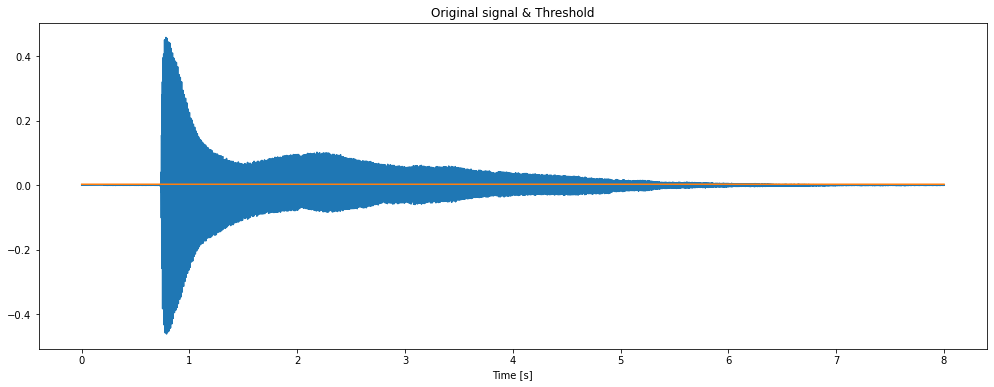

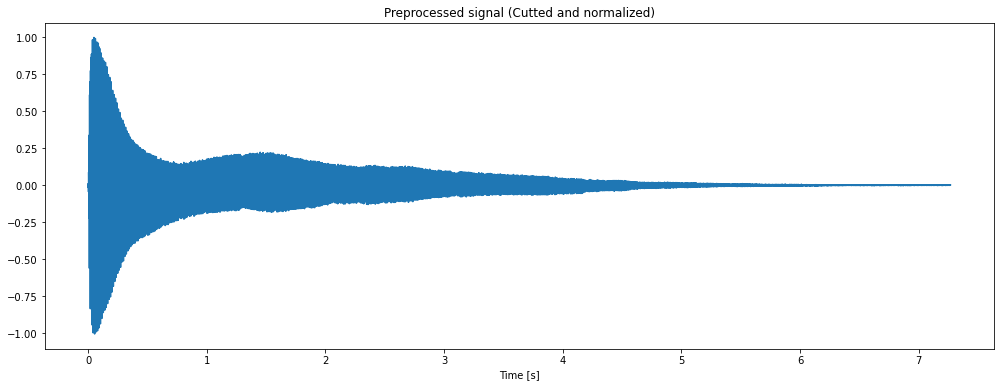

The 0.731837 first seconds are cutted
320526


In [4]:
    
# PLot data
plt.figure(figsize=(17,6))
plt.plot(signal_raw['time'], signal_raw['value'])
plt.plot(signal_raw['time'], threshold*np.ones(len(signal_raw['value'])))
plt.title('Original signal & Threshold');
plt.xlabel('Time [s]');
plt.show()

# PLot data
plt.figure(figsize=(17,6))
plt.plot(signal_preproc['time'], signal_preproc['value'])
plt.title('Preprocessed signal (Cutted and normalized)');
plt.xlabel('Time [s]');
plt.show()

duration_raw = len(signal_raw['value'])/sample_rate
duration_preproc = len(signal_preproc['value'])/sample_rate
print("The {:f} first seconds are cutted".format(duration_raw-duration_preproc))

print(len(signal_preproc['value']))

In [5]:
print(len(signal_preproc))
Sound_ana = sound_stat.Sound_analyzer(signal_preproc, sample_rate, True)
print(Sound_ana.status)
print(len(Sound_ana.time_serie))

320526
{'success': True, 'message': ['Optimize method 1']}
320000


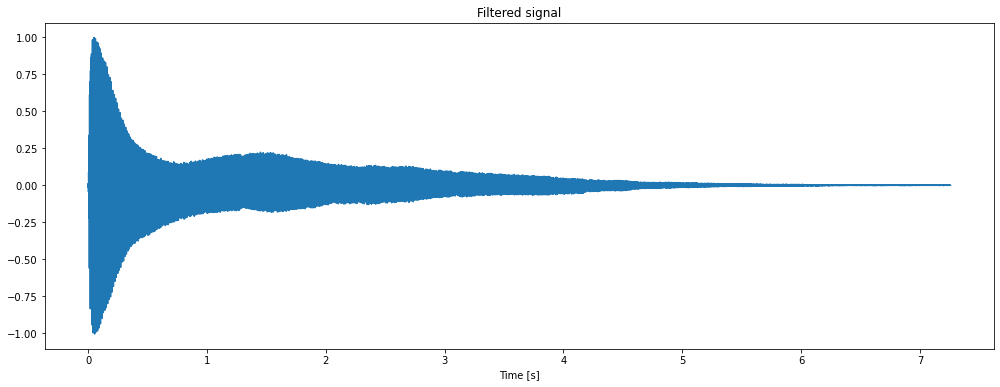

In [6]:
# PLot data
plt.figure(figsize=(17,6))
plt.plot(Sound_ana.time_serie['time'], Sound_ana.time_serie['value'])
plt.title('Filtered signal');
plt.xlabel('Time [s]');
plt.show()

## 3. Spectral analysis

### a) Compute spectrums

In [7]:
Sound_ana.get_spectra()
print(Sound_ana.status)
print(len(Sound_ana.time_serie))
print(len(Sound_ana.spect_magn))

{'success': True, 'message': ['Optimize method 1']}
320000
160000


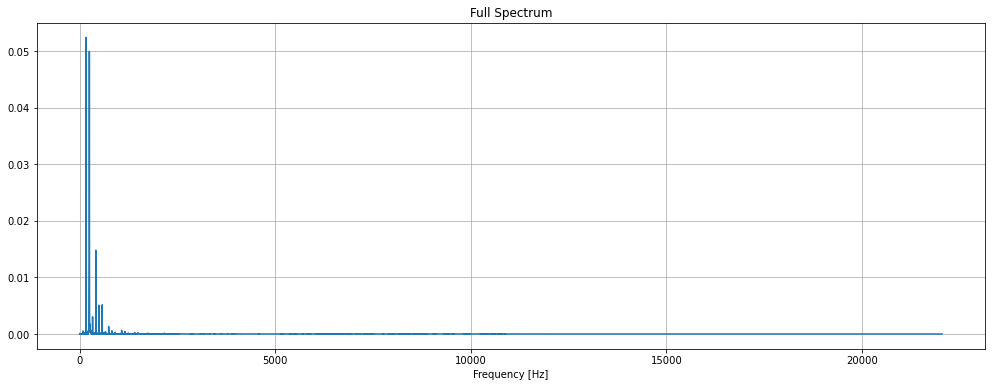

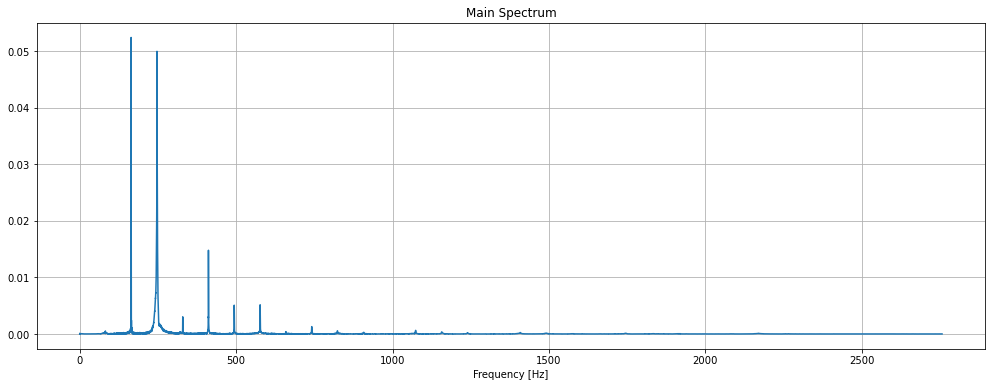

In [8]:
#############    
plt.figure(figsize=(17,6))  
plt.title('Full Spectrum')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value']) 
plt.show()


#############    
plt.figure(figsize=(17,6))  
plt.title('Main Spectrum')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'][0:Sound_ana.N//16], Sound_ana.spect_magn['value'][0:Sound_ana.N//16]) # N=nbr de données de la time série = nbr de donnée de la fft = 2*nbr de données du spectre
plt.show() 

### b) Find peaks over a threshold

In [9]:
height_peaks = 0.004
clust_dist = 20

peaks_clustered, peaks = Sound_ana.get_peaks(height_peaks, clust_dist)

D:\Users\natha\anaconda3\lib\site-packages\numpy\lib\shape_base.py:652: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = array(v, copy=False, subok=True)


Les clusters de peaks :


,frequency,magnitude,angle
0,[164.41134007087544],[0.05242256468888351],[-3.030670884173823]
1,"[239.657435358971, 240.0708754429715, 240.8977...","[0.0040904707029119315, 0.004383720941425916, ...","[1.147339135292207, 1.090849995314174, 0.91400..."
2,[411.5106969418559],[0.014799294816863201],[-0.829915669615351]
3,[493.92308701929386],[0.005086895718994817],[-1.2924881139242066]
4,[576.7489171807324],[0.005154767126659242],[2.6593304674891574]


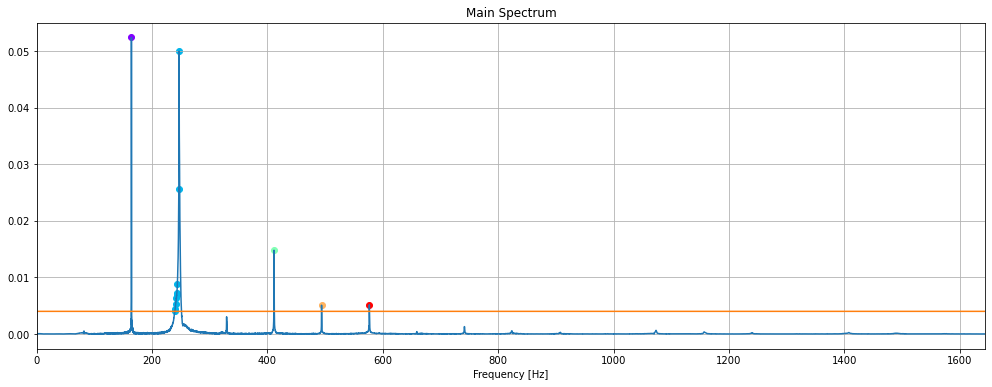

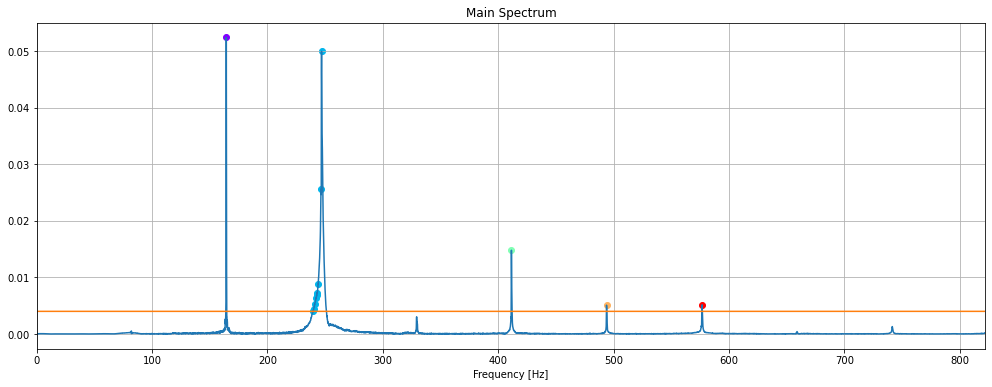

In [10]:
print("Les clusters de peaks :")
display(peaks_clustered)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

#############    
plt.figure(figsize=(17,6))
plt.title('Main Spectrum')
plt.grid()
plt.xlim([0, 10 * peaks_clustered['frequency'][0][0]])
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value'])
for i in range(len(peaks_clustered['frequency'])):
    colors = cm.rainbow(np.linspace(0, 1, len(peaks_clustered['frequency'])))
    plt.scatter(peaks_clustered['frequency'][i], peaks_clustered['magnitude'][i], c=colors[i])
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show() 

#############    
plt.figure(figsize=(17,6))  
plt.title('Main Spectrum')
plt.grid()
plt.xlim([0, 5 * peaks_clustered['frequency'][0][0]])
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value'])
for i in range(len(peaks_clustered['frequency'])):
    colors = cm.rainbow(np.linspace(0, 1, len(peaks_clustered['frequency'])))
    plt.scatter(peaks_clustered['frequency'][i], peaks_clustered['magnitude'][i], c=colors[i])
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show() 


,frequency,magnitude,angle
0,164.411340,0.052423,-3.030671
1,246.961544,0.049969,-1.118720
2,411.510697,0.014799,-0.829916
3,493.923087,0.005087,-1.292488
4,576.748917,0.005155,2.659330


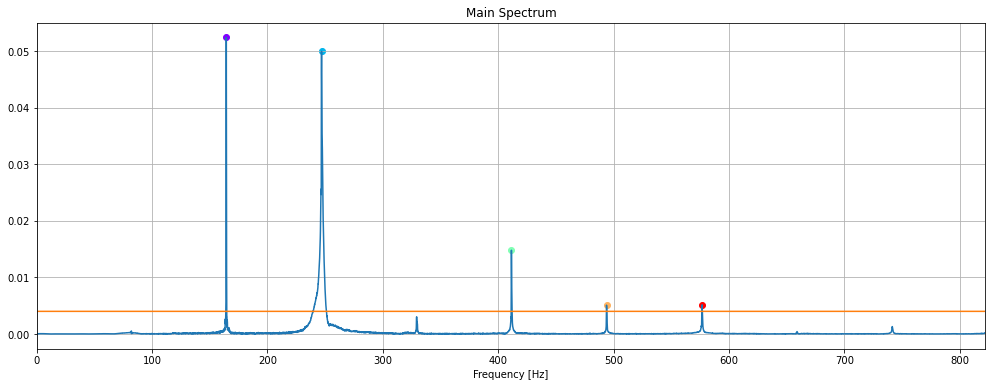

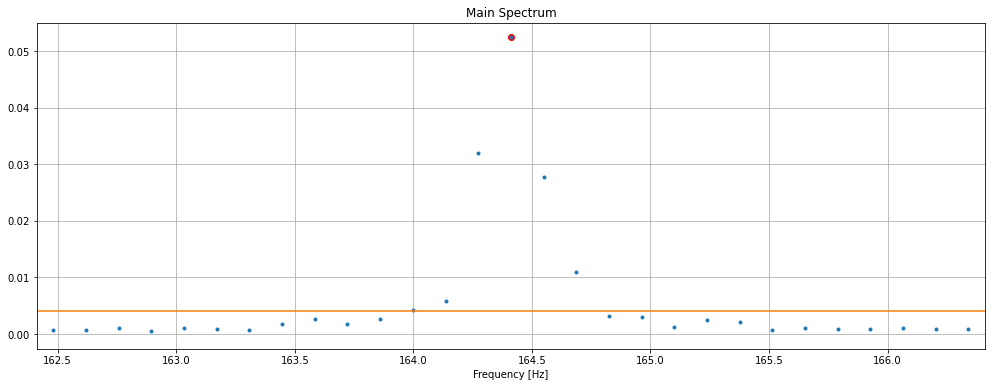

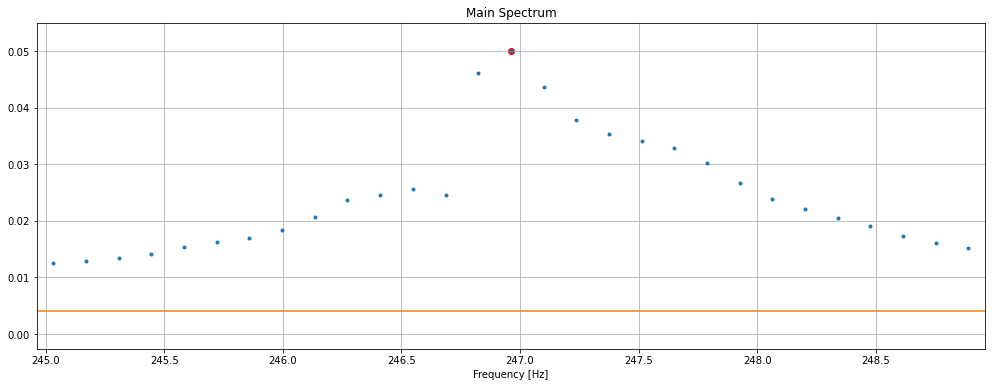

In [11]:
display(peaks)

#############    
plt.figure(figsize=(17,6))  
plt.title('Main Spectrum')
plt.grid()
plt.xlim([0, 5 * peaks['frequency'][0]])
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value'])
for i in range(len(peaks_clustered['frequency'])):
    colors = cm.rainbow(np.linspace(0, 1, len(peaks_clustered['frequency'])))
    plt.scatter(peaks['frequency'][i], peaks['magnitude'][i], c=colors[i])
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show() 

#############    
plt.figure(figsize=(17,6))  
plt.title('Main Spectrum')
plt.grid()
plt.xlim(peaks['frequency'][0]-2, peaks['frequency'][0]+2)
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value'], '.')
plt.scatter(peaks['frequency'][0], peaks['magnitude'][0], c='red')
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show() 

#############    
plt.figure(figsize=(17,6))  
plt.title('Main Spectrum')
plt.grid()
plt.xlim(peaks['frequency'][1]-2, peaks['frequency'][1]+2)
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value'], '.')
plt.scatter(peaks['frequency'][1], peaks['magnitude'][1], c='red')
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show() 

## 4.  Envelope analyzer

Obtenir l'envelope: hilbert transform sur le signal filtré par un lowpass filter.
L'envelop est aussi filtrée.

In [12]:
cutoff_signal = 600
cutoff_hilbert = 25
order = 3

sound_filt = Sound_ana.get_envelope(cutoff_signal, cutoff_hilbert, order)


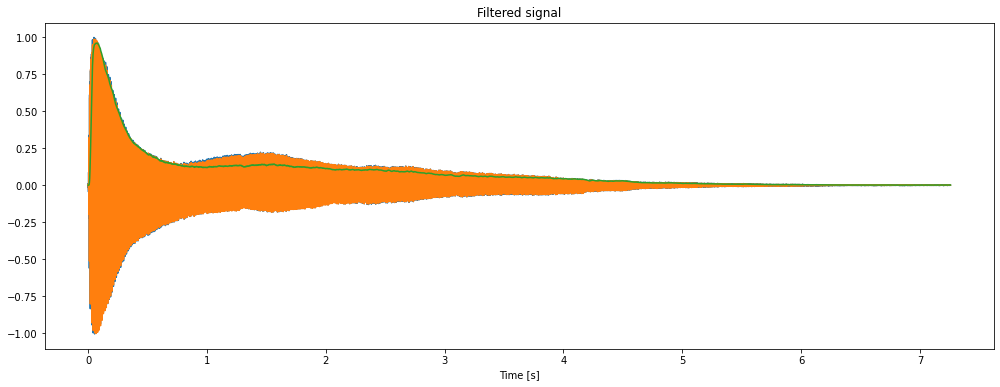

In [14]:
# PLot data
plt.figure(figsize=(17,6))
plt.plot(Sound_ana.time_serie['time'], Sound_ana.time_serie['value'])
plt.plot(Sound_ana.time_serie['time'], sound_filt)
plt.plot(Sound_ana.time_serie['time'], Sound_ana.env)
plt.title('Filtered signal');
plt.xlabel('Time [s]');
plt.show()

In [18]:
attack = 140
decay = 5
sustheight = 1.8
sustatta = 0.1
sustdec = 0.8
tol = 50
x_init = [attack, decay, sustheight, sustatta, sustdec]
xopt = Sound_ana.opt_envelope_set(Sound_ana.time_serie['time'], x_init, tol)
print(xopt)

env_fmin = Sound_ana.env_synth(Sound_ana.time_serie['time'], xopt)

Optimization terminated successfully.
         Current function value: 2417.129098
         Iterations: 327
         Function evaluations: 524
[19.935057    5.96587217  0.862505    0.22399275  0.76880042]


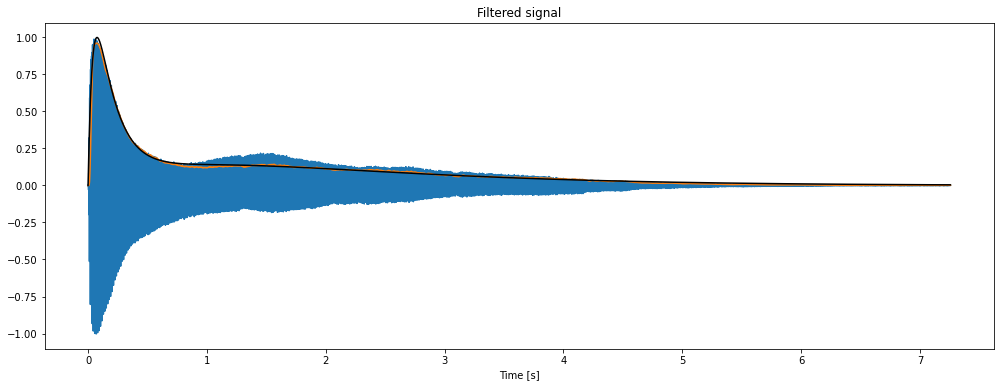

In [19]:
# PLot data
plt.figure(figsize=(17,6))
plt.plot(Sound_ana.time_serie['time'], sound_filt)
plt.plot(Sound_ana.time_serie['time'], Sound_ana.env)
plt.plot(Sound_ana.time_serie['time'], env_fmin, 'k')
plt.title('Filtered signal');
plt.xlabel('Time [s]');
plt.show()

Use the manual envelope creation to find a good x_init (envelope_set)

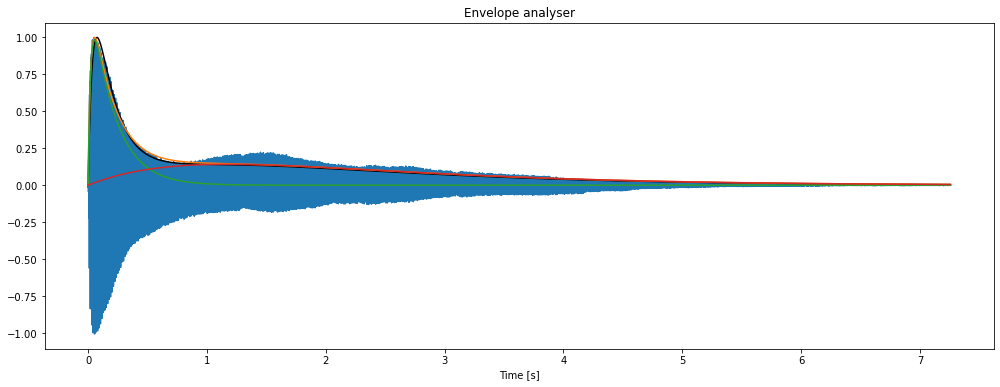

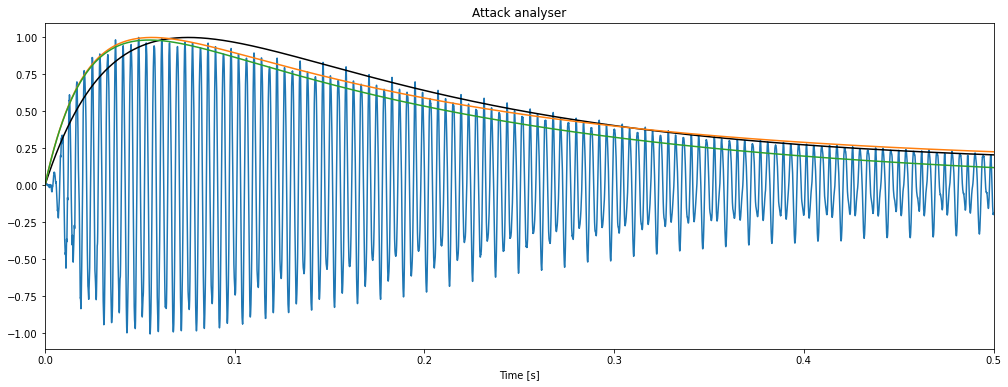

In [17]:

attack = 40
decay = 5
sustheight = 1.5
sustatta = 0.1
sustdec = 0.8
envelope_set = [attack, decay, sustheight, sustatta, sustdec]
[env_manu, attadec, sust] = Sound_ana.env_synth(Sound_ana.time_serie['time'], envelope_set, full_output=1)


# PLot data
plt.figure(figsize=(17,6))
plt.plot(Sound_ana.time_serie['time'], Sound_ana.time_serie['value'])
plt.plot(Sound_ana.time_serie['time'], env_fmin, 'k')
plt.plot(Sound_ana.time_serie['time'], env_manu)
plt.plot(Sound_ana.time_serie['time'], attadec)
plt.plot(Sound_ana.time_serie['time'], sust)

plt.title('Envelope analyser');
plt.xlabel('Time [s]');
plt.show()

# Zoom

plt.figure(figsize=(17,6))
plt.plot(Sound_ana.time_serie['time'], Sound_ana.time_serie['value'])
plt.plot(Sound_ana.time_serie['time'], env_fmin, 'k')
plt.plot(Sound_ana.time_serie['time'], env_manu)
plt.plot(Sound_ana.time_serie['time'], attadec)
plt.xlim(0, 0.5)

plt.title('Attack analyser');
plt.xlabel('Time [s]');
plt.show()


 # Visualize fft and spectrums

D:\Users\natha\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


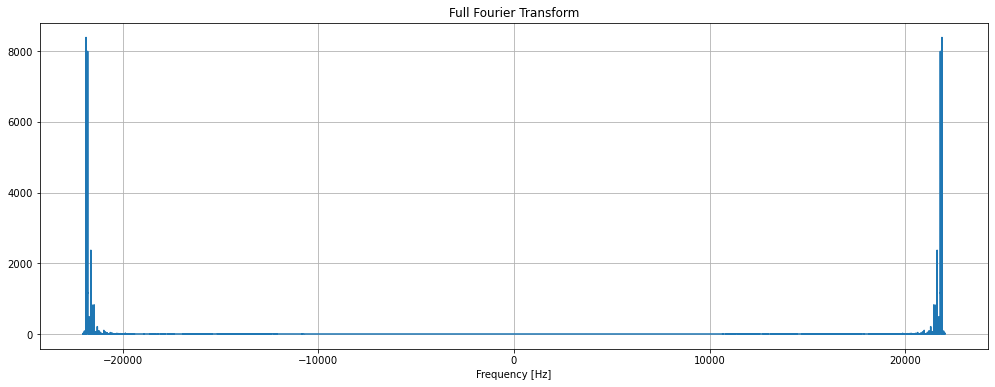

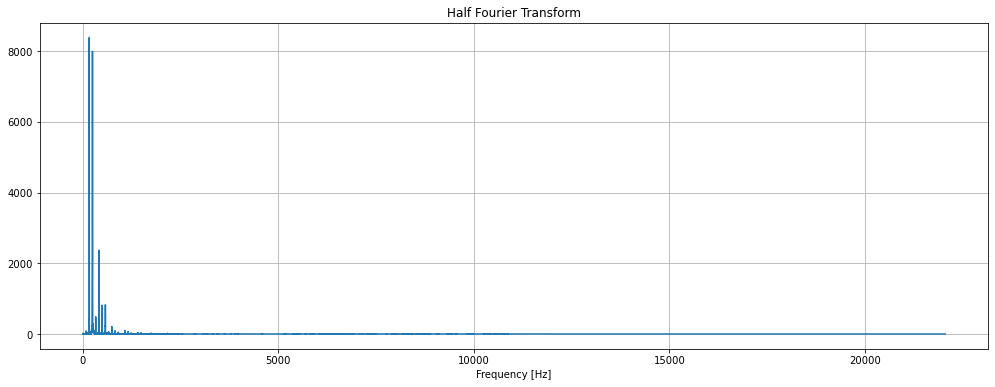

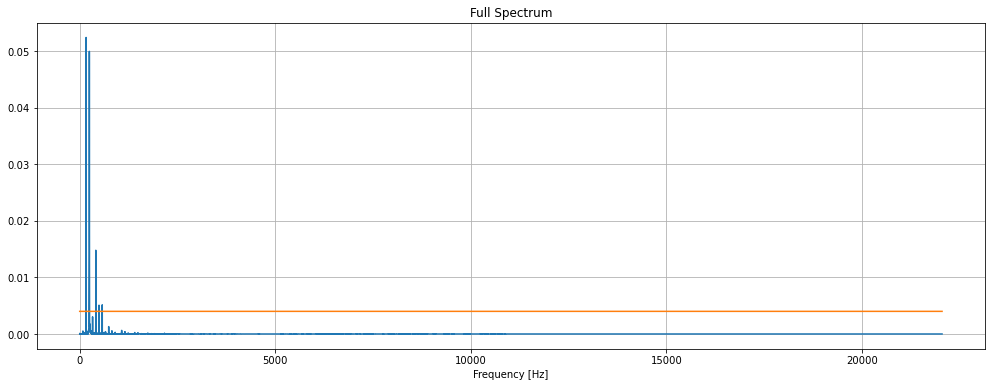

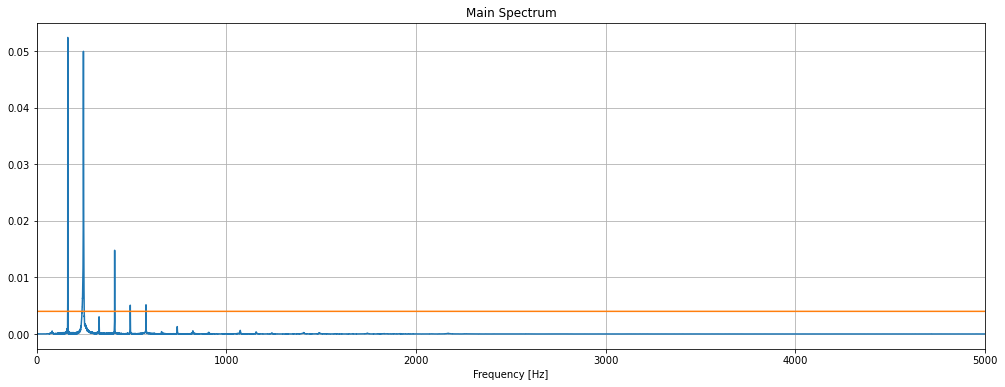

In [20]:

#############    
plt.figure(figsize=(17,6))  
plt.title('Full Fourier Transform')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.fft_data['frequency'], np.abs(Sound_ana.fft_data['value']))   
plt.show() 

#############    
plt.figure(figsize=(17,6))  
plt.title('Half Fourier Transform')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], np.abs(Sound_ana.fft_data['value'][0:Sound_ana.N//2]))  
plt.show() 

#############    
plt.figure(figsize=(17,6))  
plt.title('Full Spectrum')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value']) 
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show()

#############    
plt.figure(figsize=(17,6))  
plt.title('Main Spectrum')
plt.grid()
plt.xlim([0, 5000])
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_magn['frequency'], Sound_ana.spect_magn['value']) 
plt.plot(Sound_ana.spect_magn['frequency'], height_peaks*np.ones(len(Sound_ana.spect_magn)))
plt.show() 


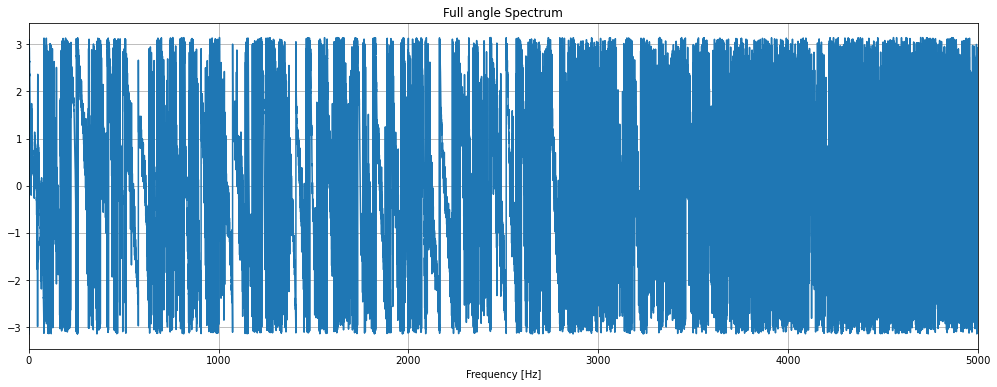

In [21]:

# #############    
# plt.figure(figsize=(17,6))  
# plt.title('Full Fourier Transform')
# plt.grid()
# plt.xlabel('Frequency [Hz]')
# plt.plot(Sound_ana.fft_data['frequency'], np.angle(Sound_ana.fft_data['value'])) 
# plt.show() 

# #############    
# plt.figure(figsize=(17,6))  
# plt.title('Half Fourier Transform')
# plt.grid() 
# plt.xlabel('Frequency [Hz]')
# plt.plot(Sound_ana.spect_angle['frequency'], np.angle(Sound_ana.fourier_transform[0:Sound_ana.N//2]))  
# plt.show()

#############    
plt.figure(figsize=(17,6))  
plt.title('Full angle Spectrum')
plt.grid()
plt.xlim([0, 5000])
plt.xlabel('Frequency [Hz]')
plt.plot(Sound_ana.spect_angle['frequency'], Sound_ana.spect_angle['value'])    
plt.show()

## Fast way to visualise spectrum

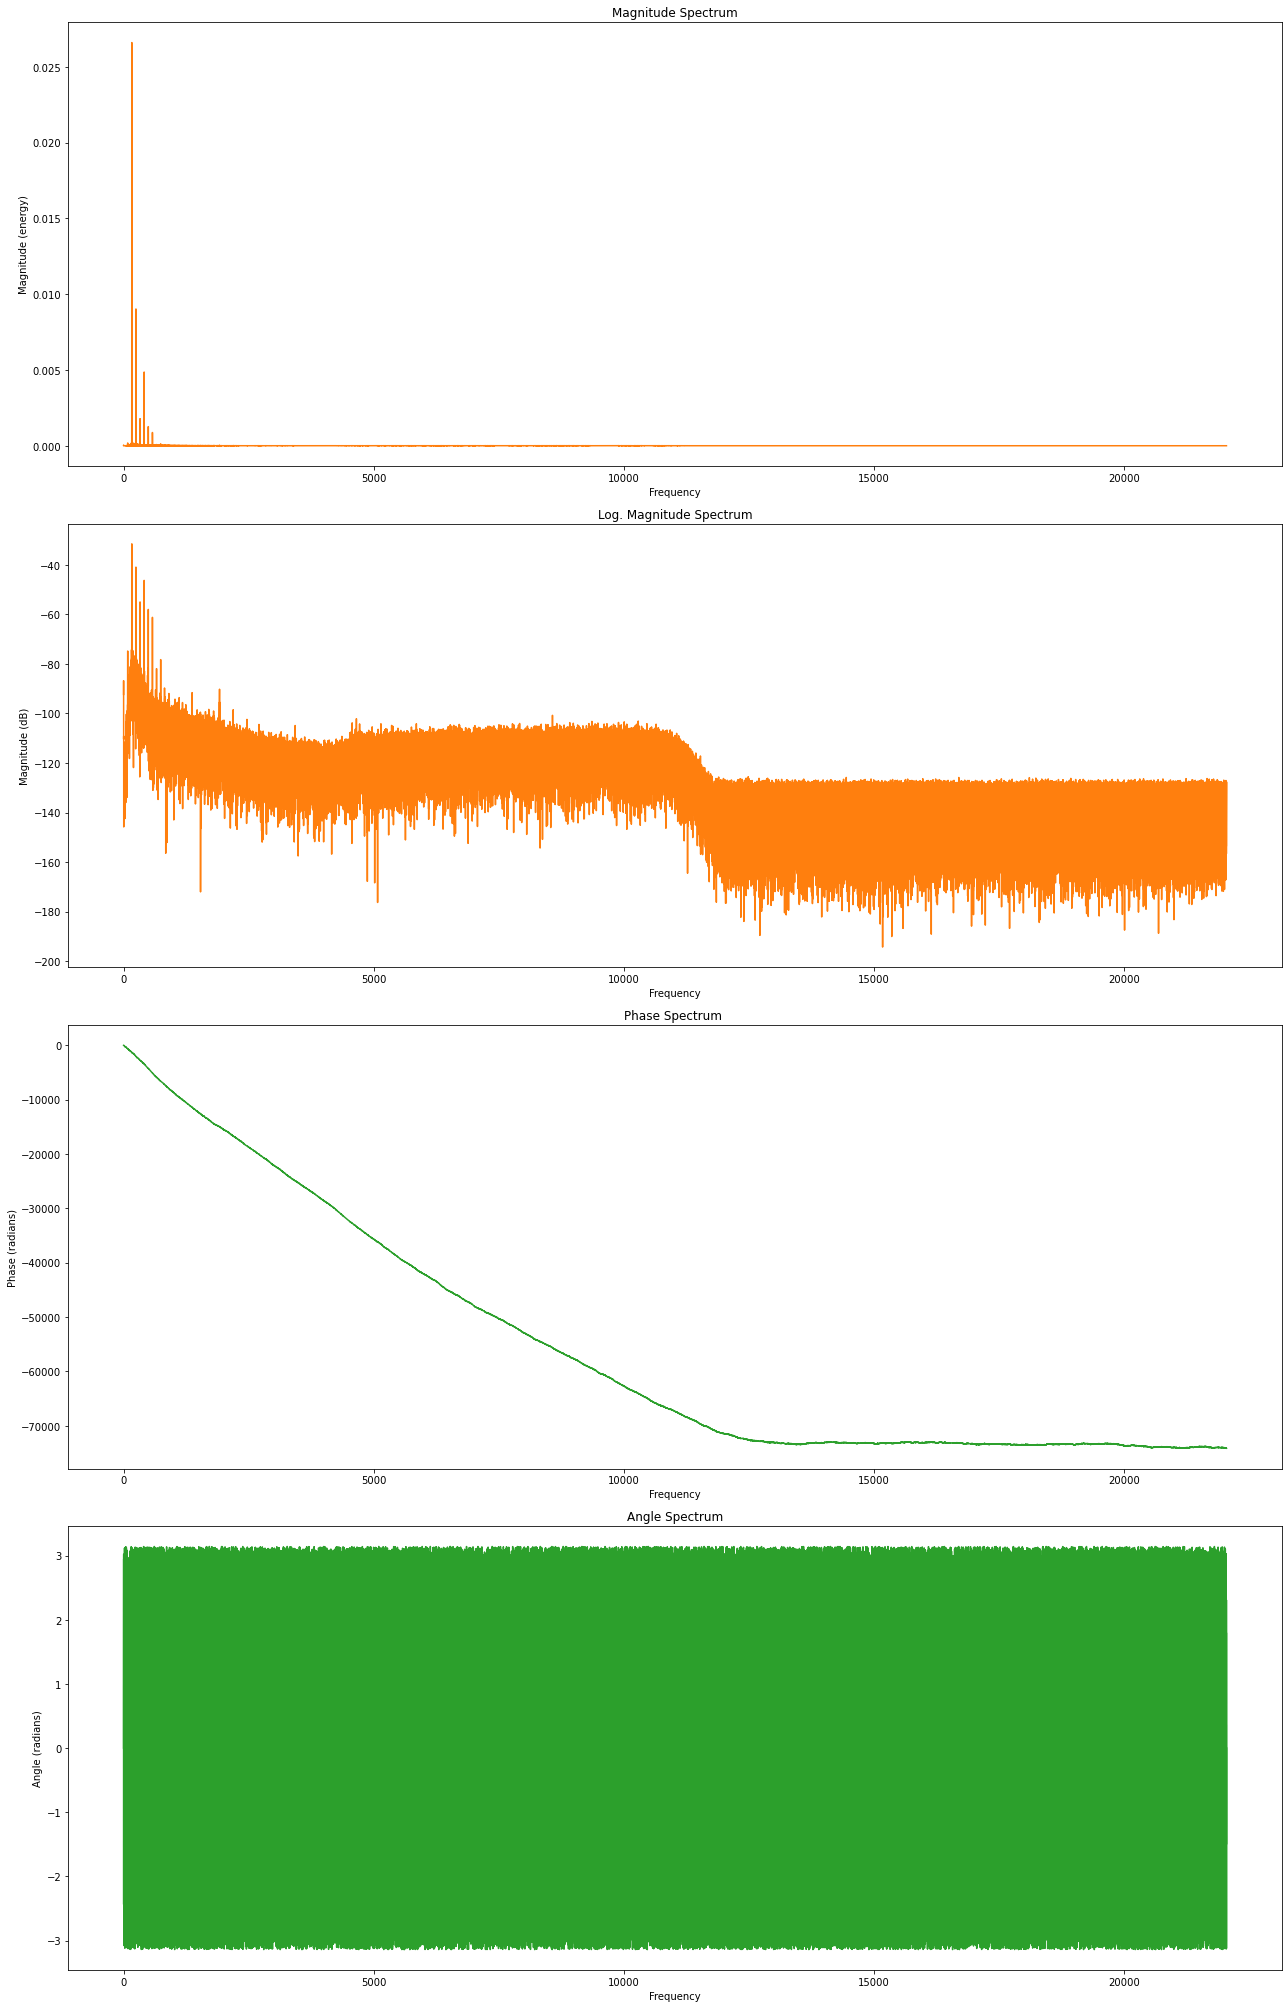

In [20]:
# Fast way to compute and plot spectrums
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(18, 28))

# plot different spectrum types:
axs[0].set_title("Magnitude Spectrum")
magn_spect = axs[0].magnitude_spectrum(signal_preproc['value'], Fs = sample_rate, color = 'C1')

axs[1].set_title("Log. Magnitude Spectrum")
axs[1].magnitude_spectrum(signal_preproc['value'], Fs = sample_rate, scale = 'dB', color = 'C1')

axs[2].set_title("Phase Spectrum ")
phase_spect = axs[2].phase_spectrum(signal_preproc['value'], Fs = sample_rate, color = 'C2')

axs[3].set_title("Angle Spectrum")
angle_spect = axs[3].angle_spectrum(signal_preproc['value'], Fs = sample_rate, color = 'C2')

fig.tight_layout()
plt.show()

# Visualise ifft of parts of spectrum
To learn about the spectrum

In [20]:
ifft

NameError: name 'ifft' is not defined

# Old codes of this project

## Somme complexes
#### Verifier la théorie de cette partie!! Voir ce qui marche le mieux en pratique entre ca et modifier les données pour avoir un spectre a 1harmo=1peak

On fait la somme complexe des peaks voisins, comme si ils represent la même fréquence. Ils représentent des fréqs tellement proches que je pense c'est ok mais je trouve pas de documentation qui confirme.

Attention! Du coup on supprime le phénomène de battement.

In [ ]:

# def sum2peaks(freq_peak_0, magn_peak_0, angle_peak_0, freq_peak_1, magn_peak_1, angle_peak_1):
#     result_freq = 0
#     result_magn = 0
#     result_angle = 0
    
#     result_freq = (freq_peak_0*magn_peak_0 + freq_peak_1*magn_peak_1)/(magn_peak_0+magn_peak_1) # The resulting freq is the wheighted mean of the freq

    
#     comp_0 = cmath.rect(magn_peak_0, angle_peak_0)
#     comp_1 = cmath.rect(magn_peak_1, angle_peak_1)
#     comp_result = comp_0 + comp_1
#     (result_magn, result_angle) = cmath.polar(comp_result)
    
#     return [result_freq, result_magn, result_angle];


# harmos_freq = []
# harmos_magn = []
# harmos_angle = []

# for i in range(len(peaks_clustered)):
#     result_freq = 0
#     result_magn = 0
#     result_angle = 0
    
#     # There are several peaks for one harmonic => harmonic = complex sum of the peaks
#     if len(peaks_clustered['frequency'][i]) >= 2:
#         for k in range(len(peaks_clustered['frequency'][i])):
#             # First iteration : sum of 0 and a complexe number => result = the input complexe number. Next iterations => sum of 2 complex numbers
#             [result_freq, result_magn, result_angle] = sum2peaks(result_freq, result_magn, result_angle, peaks_clustered['frequency'][i][k], peaks_clustered['magnitude'][i][k], peaks_clustered['angle'][i][k])

#     # If there is on peak for a harmonic => harmonic = peak
#     else:
#         result_freq = peaks_clustered['frequency'][i][0]
#         result_magn = peaks_clustered['magnitude'][i][0]
#         result_angle = peaks_clustered['angle'][i][0]
        
#     harmos_freq.append(result_freq)
#     harmos_magn.append(result_magn)
#     harmos_angle.append(result_angle)

# print("Les harmoniques :")
# display(pd.DataFrame(np.column_stack((harmos_freq, harmos_magn, harmos_angle)), columns=['frequency', 'magnitude', 'angle']))

## Filter

In [35]:
# # Filtre passe haut
# # Apply filtering
# filt_input = true
# o_hp = 0         # Order of highpass Butterworth filter
# fc_hp = 0        # Cut-off frequency of highpass Butterworth filter
# norm_acc_val = 1 # Value at which the frequency fc_hp is normalised when norm_acc = 1
# if filt_input:
#     # Generate highpass Butterworth filter
#     [b,a] = signal.butter(o_hp,fc_hp/(sample_rate/2),'high')
#     xi = signal.lfiltic(b,a,np.zeros(o_hp),np.mean(meas_cut)*np.ones(o_hp))    
#     [meas_filt,xf] = signal.lfilter(b,a,meas_cut,0,xi)
# else:    
#     meas_filt = meas_cut

## Enveloppe spectrum

In [97]:
# envelope = ss.envelope_curve_analysis(fourier_transform.copy(), N, spectrum['frequency'], sample_rate, fc_range = [4000,5000])
# env_time_serie = envelope['envelope_time_serie']
# env_spectrum = envelope['envelope_spectrum']

# # PLot data
# plt.figure(figsize=(17,6))
# plt.plot(env_time_serie['time'], env_time_serie['value'])
# plt.title('Signal frequency band');
# plt.xlabel('Time [s]');
# plt.show()

# #############    
# plt.figure(figsize=(17,6))  
# plt.title('Demodulated amplitude spectrum')
# plt.grid()
# plt.xlabel('Frequency [Hz]')
# plt.plot(env_spectrum['frequency'], env_spectrum['value'])   
# plt.show()   
    
# #############
# plt.figure(figsize=(17,6))
# plt.title('Demodulated amplitude spectrum')
# plt.xlim([0,ademod_spectrum_xlim])
# plt.grid()
# plt.xlabel('Frequency [Hz]')
# # for i in range(1, 8):
# #     plt.plot([i*BPFO, i*BPFO], [0, ademod_spectrum_ylim],'orange')    
# #     plt.plot([i*BPFI, i*BPFI], [0, ademod_spectrum_ylim],'green')  
# plt.plot(env_spectrum['frequency'], env_spectrum['value'])    
# plt.show()

## End data to urlAPI

In [98]:
# #Create the object to add
# string_spect_freq = spectrum['frequency'].to_json(orient='values')
# string_spect_value = spectrum['value'].to_json(orient='values')
# string_env_spect_freq = envelope['envelope_spectrum']['frequency'].to_json(orient='values')
# string_env_spect_value = envelope['envelope_spectrum']['value'].to_json(orient='values')

# healthIndicators = {"aggregation":{"mean": mean, "variance": var, "std": std, "rms": rms, "peak": peak, 
#                                     "crest": crest, "skewness": skewness, "kurtosis": kurtosis},
#                     "spectrum": {"frequency": string_spect_freq,"value": string_spect_value},
#                     "envelope_spectrum": {"frequency": string_env_spect_freq, "value": string_env_spect_value}}

# # Store data in mongodb
# urlPut = urlAPI + docId
# post = requests.put(urlPut, json = healthIndicators)
# print(post.status_code)

## Ancienne methode pour classifier les données grace à k-means et plus proche voisin

### K-means

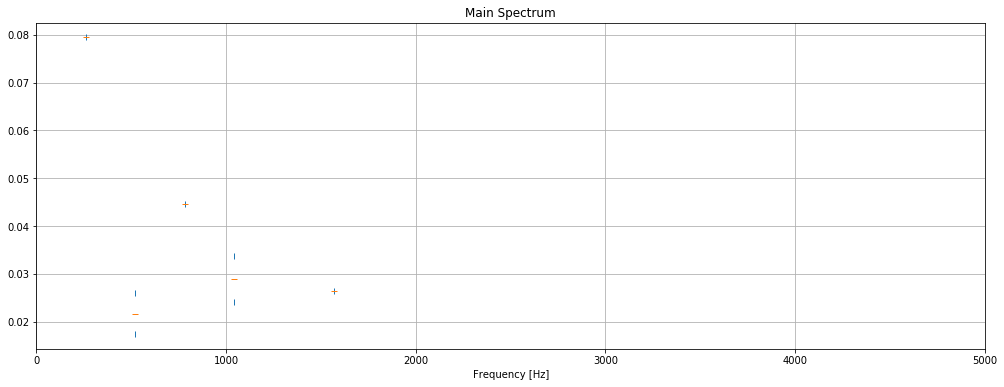

In [100]:
# # Trouver la position des clusters

# kmeans = KMeans(n_clusters=nbrHarmo, init='k-means++', max_iter=300, n_init=10, random_state=0)
# pred_y = kmeans.fit_predict(peaks_coord)

# #############    
# plt.figure(figsize=(17,6))  
# plt.title('Main Spectrum')
# plt.grid()
# plt.xlim([0, 5000])
# plt.xlabel('Frequency [Hz]')
# plt.plot(peaks_coord[:,0], peaks_coord[:,1], '|')
# plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], '_')
# plt.show() 

### Plus proche voisin

In [31]:
# # Utiliser les données renvoyées par kmeans avec le plus proche voisin pour savoir l'index de quelle telle donnée (bleue) appartient a telle cluster. Pour faire les claculs sur ces données
# from operator import itemgetter

# harmos = kmeans.cluster_centers_[:, 0]
# harmos = np.sort(harmos)
# fundam = harmos[0]

# distVec = []
# minDistIdx = 0
# peaks_freq_clustered = [[] for y in range(nbrHarmo)]
# peaks_magn_clustered = [[] for y in range(nbrHarmo)]
# peaks_angle_clustered = [[] for y in range(nbrHarmo)]

# # clustered the peaks by the closest neighbour of an harmonic
# for i in range(len(peaks_freq)):
#     distVec = harmos - peaks_freq[i]
#     distVec = abs(distVec)
#     minDistIdx = min(enumerate(distVec), key=itemgetter(1))[0]
#     peaks_freq_clustered[minDistIdx].append(peaks_freq[i])
#     peaks_magn_clustered[minDistIdx].append(peaks_magn[i])
#     peaks_angle_clustered[minDistIdx].append(peaks_angle[i])

# print("La classification :")
# display(pd.DataFrame(np.column_stack((peaks_freq_clustered, peaks_magn_clustered, peaks_angle_clustered)), columns=['frequency', 'magnitude', 'angle']))



La classification :


,frequency,magn,angle
0,[259.9073283745885],[0.07943154235823673],[-2.418450136259578]
1,"[519.814656749177, 520.7108889159858]","[0.025928115398655145, 0.017404838407521547]","[1.7909453952544094, -0.46711648456802357]"
2,[781.5144494573832],[0.044560075886122215],[-0.7917379315489025]
3,"[1041.8698939153762, 1043.2142421655894]","[0.033797041905718625, 0.02401979506151214]","[1.416122806229955, 0.45732285755404917]"
4,[1304.9140348737958],[0.009978225985826353],[0.7806716436259765]
5,"[1568.8544079990245, 1570.198756249238]","[0.026403353192122597, 0.014391500940894142]","[1.544367426757192, 0.1789343033369695]"
6,"[1834.1391293744664, 1835.4834776246798]","[0.010341163554450469, 0.008132057454170314]","[0.8046416520221552, 0.3208957852201432]"
7,[2101.6644311669306],[0.009199804573297549],[-0.742266538704884]
